# Active Subspace Analysis Notebook for ATACAMAC Model

**DESCRIPTION**

This data set comes from a simulation of an idealized annular combustor with 19 flames. The simulation code was written by Michael Bauerheim. The inputs are parameters of the flames---2 per flame. The output is the real part of the maximum frequency, which is related to the stability of the flow. There are two cases to consider related to the strength of coupling in the system. Gradients are computed with finite differences.

**INPUTS (38) --- Weak coupling**

Variable | Mean | Std dev | Density
--- | --- | --- | ---
n1-n19 | 0.5 | 0.0866 | Gaussian
tau1-tau19 | 0.000635 | 5.5e-5 | Gaussian

**INPUTS (38) --- Strong coupling**

Variable | Mean | Std dev | Density
--- | --- | --- | ---
n1-n19 | 1.75 | 0.3031 | Gaussian
tau1-tau19 | 0.000735 | 6.37e-5 | Gaussian

**OUTPUTS (1)**

Variable | Description
--- | --- 
maxFreq | Maximum frequency of the system that determines the stability

**REFERENCES**

+ Bauerheim, Ndiaye, Constantine, Iaccarino, Moreau, and Nicoud. Uncertainty quantification of thermo-acoustic instabilities in annular combustors
+ Constantine, Dow, and Wang. [Active Subspace Methods in Theory and Practice: Applications to Kriging Surfaces](http://epubs.siam.org/doi/abs/10.1137/130916138)

**CONTACT**

Questions or comments? Contact [Paul Constantine](mailto:pconstan@mines.edu)


In [1]:
import numpy as np
import pandas as pn
import active_subspaces as ac
%matplotlib inline

Import the data set. Distinguish inputs (X), outputs (F), and gradients (G).

In [2]:
#df = pn.DataFrame.from_csv('atacamac-weak.txt')
df = pn.DataFrame.from_csv('atacamac-strong.txt')
data = df.as_matrix()
X = data[:,:38]
f = data[:,38]
G = data[:,39:]
M,m = X.shape
labels = df.keys()
in_labels = labels[:38]
out_label = labels[38]

Normalize the inputs to standard normal. 

In [3]:
#n_mean = 0.5; tau_mean = 0.000635 # weakly coupled
n_mean = 1.75; tau_mean = 0.000735 # strongly coupled
xmean = np.hstack((n_mean*np.ones((1,19)),tau_mean*np.ones((1,19))))
xstd = np.diagflat(np.hstack((n_mean*0.1*np.sqrt(3)*np.ones((1,19)),
                             tau_mean*0.05*np.sqrt(3)*np.ones((1,19)))))
XX = ac.utils.misc.UnboundedNormalizer(xmean,xstd).normalize(X)

Compute the active subspace.

In [4]:
ss = ac.subspaces.Subspaces()
ss.compute(df=G,nboot=200)

Plot eigenvalues and subspace errors.

/home/ryhoward/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


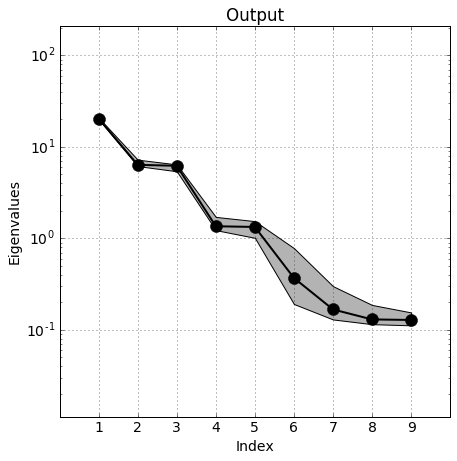

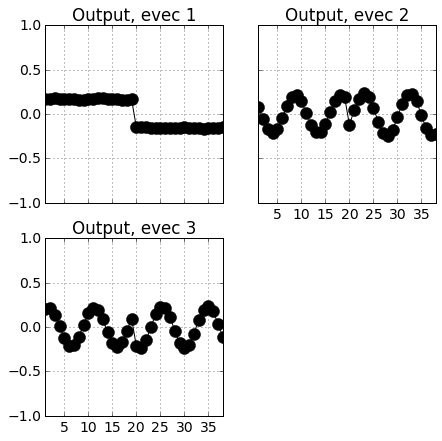

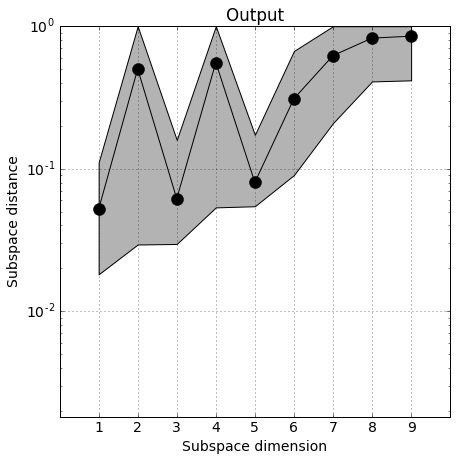

In [5]:
ac.utils.plotters.eigenvalues(ss.eigenvalues[:9],ss.e_br[:9])
W = np.hstack((ss.W1,ss.W2))
ac.utils.plotters.eigenvectors(W[:,:3])
ac.utils.plotters.subspace_errors(ss.sub_br[:9])

One- and two-d sufficient summary plots.

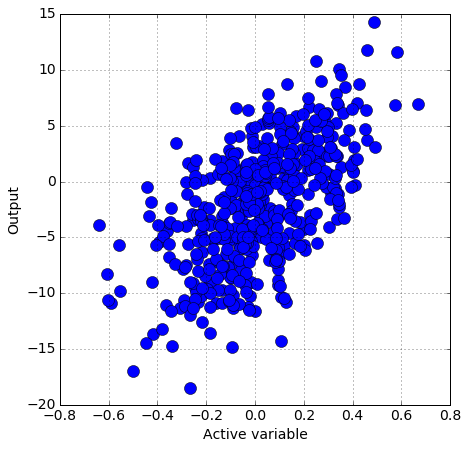

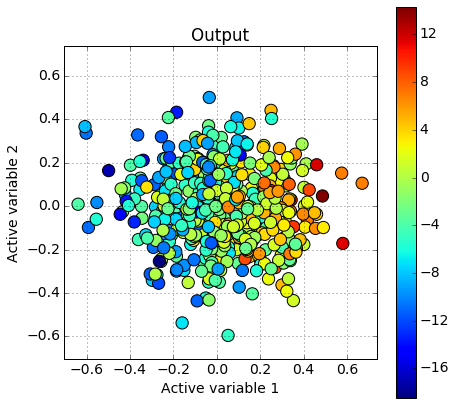

In [6]:
ss.partition(2)
ac.utils.plotters.sufficient_summary(XX.dot(ss.W1),f)